##Downloading Dataset (Not Requried in Windows)

##Importing Libraires

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Loading Data / Assigning Variables

In [4]:

import pandas as pd


features_list_path = r"C:\Users\HP\Downloads\resume\kddcup.names"
attack_types_path = r"C:\Users\HP\Downloads\resume\training_attack_types"
dataset_path = r"C:\Users\HP\Downloads\resume\kddcup.data_10_percent.gz"


def print_file_contents(file_path):
    try:
        with open(file_path, 'r') as f:
            print(f.read())
    except FileNotFoundError:
        print(f"File '{file_path}' not found. Please check the path and try again.")

# Print contents of features list
print("Features List:")
print_file_contents(features_list_path)

# Print contents of attack types (if needed)
print("\nAttack Types:")
print_file_contents(attack_types_path)

# Define column names based on the features list from kddcup.names
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
    'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'label'
]

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(dataset_path, names=columns)
df.head()


Features List:
File 'C:\Users\HP\Downloads\resume\kddcup.names' not found. Please check the path and try again.

Attack Types:
File 'C:\Users\HP\Downloads\resume\training_attack_types' not found. Please check the path and try again.


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


Dataset saved successfully to: dataset\attack_data.csv
     Attack Type                                        Description Severity  \
0        Malware  Malicious software designed to harm a computer...     High   
1       Phishing  Fraudulent attempt to obtain sensitive informa...   Medium   
2           DDoS  Denial of Service attack floods a system with ...     High   
3  SQL Injection       Attempt to execute malicious SQL statements.     High   
4           DDoS                          New attack of type 'DDoS'   Medium   

         Date      Time  
0  2024-07-28  12:00:00  
1  2024-07-28  12:00:00  
2  2024-07-28  12:00:00  
3  2024-07-28  12:00:00  
4  2024-07-21  08:16:26  
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        77
           2       1.00      1.00      1.00        68
           3       1.00      1.00      1.00        90

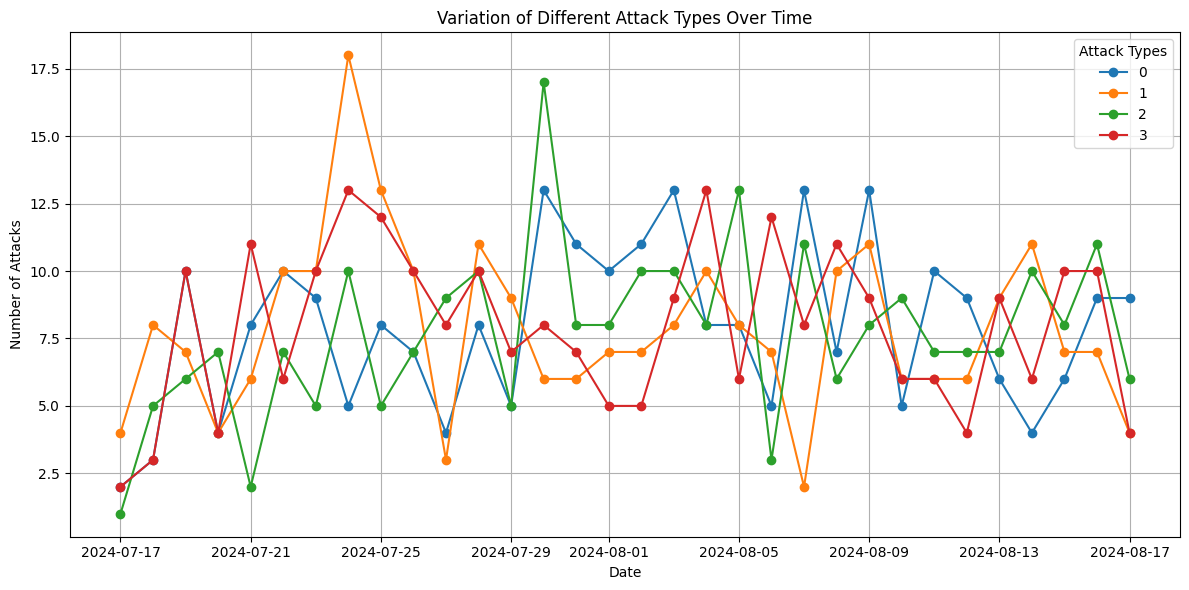

In [1]:
import os
import pandas as pd
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Sample data
data = {
    'Attack Type': ['Malware', 'Phishing', 'DDoS', 'SQL Injection'],
    'Description': ['Malicious software designed to harm a computer system.', 
                    'Fraudulent attempt to obtain sensitive information.', 
                    'Denial of Service attack floods a system with requests.', 
                    'Attempt to execute malicious SQL statements.'],
    'Severity': ['High', 'Medium', 'High', 'High']
}

# Generate additional data
additional_data = {
    'Attack Type': [],
    'Description': [],
    'Severity': [],
    'Date': [],
    'Time': []
}

# Generate 1000 additional attacks with random timestamps
start_date = datetime.now() - timedelta(days=30)
for _ in range(1000):
    attack_type = random.choice(data['Attack Type'])
    description = f"New attack of type '{attack_type}'"
    severity = random.choice(data['Severity'])
    attack_datetime = start_date + timedelta(days=random.randint(0, 30), hours=random.randint(0, 23),  minutes=random.randint(0, 59), seconds=random.randint(0, 59))
    
    additional_data['Attack Type'].append(attack_type)
    additional_data['Description'].append(description)
    additional_data['Severity'].append(severity)
    additional_data['Date'].append(attack_datetime.strftime('%Y-%m-%d'))
    additional_data['Time'].append(attack_datetime.strftime('%H:%M:%S'))

# Extend original data with additional data
data['Attack Type'].extend(additional_data['Attack Type'])
data['Description'].extend(additional_data['Description'])
data['Severity'].extend(additional_data['Severity'])

original_data_length = len(data['Attack Type']) - 1000
data['Date'] = ['2024-07-28'] * original_data_length + additional_data['Date']
data['Time'] = ['12:00:00'] * original_data_length + additional_data['Time']

# Save dataset
dataset_dir = 'dataset'
os.makedirs(dataset_dir, exist_ok=True)
df = pd.DataFrame(data)
csv_file_path = os.path.join(dataset_dir, 'attack_data.csv')
df.to_csv(csv_file_path, index=False)

print(f"Dataset saved successfully to: {csv_file_path}")
print(df.head())

# Prepare data for modeling
df['Attack Type'] = df['Attack Type'].astype('category').cat.codes
df['Severity'] = df['Severity'].astype('category').cat.codes

# Features and target
X = df[['Attack Type', 'Severity']]
y = df['Attack Type']  # For simplicity, using 'Attack Type' as the target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plotting the variation of different attack types over time
# Convert 'Date' to datetime format for better handling
df['Date'] = pd.to_datetime(df['Date'])

# Group by 'Date' and 'Attack Type' and count occurrences
grouped_df = df.groupby(['Date', 'Attack Type']).size().unstack(fill_value=0)

# Plot the data
plt.figure(figsize=(12, 6))
for attack_type in grouped_df.columns:
    plt.plot(grouped_df.index, grouped_df[attack_type], label=attack_type, marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Number of Attacks')
plt.title('Variation of Different Attack Types Over Time')
plt.legend(title='Attack Types')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


##Cleaning Data

In [4]:
df.shape

(494021, 42)

In [5]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [2]:
import pandas as pd
import numpy as np

# Creating a sample DataFrame with some missing values
data = {
    'Attack Type': ['Malware', 'Phishing', np.nan, 'DDoS'],
    'Description': ['Text1', 'Text2', 'Text3', np.nan],
    'Severity': ['High', 'Medium', np.nan, 'High'],
    'Date': ['2024-07-28', '2024-07-28', '2024-07-29', np.nan],
    'Time': ['12:00:00', '12:00:00', '13:00:00', '14:00:00']
}

df = pd.DataFrame(data)

# Check for missing values
null_counts = df.isnull().sum()

# Display the DataFrame and the count of missing values
print("DataFrame:")
print(df)
print("\nCount of Missing Values in Each Column:")
print(null_counts)


DataFrame:
  Attack Type Description Severity        Date      Time
0     Malware       Text1     High  2024-07-28  12:00:00
1    Phishing       Text2   Medium  2024-07-28  12:00:00
2         NaN       Text3      NaN  2024-07-29  13:00:00
3        DDoS         NaN     High         NaN  14:00:00

Count of Missing Values in Each Column:
Attack Type    1
Description    1
Severity       1
Date           1
Time           0
dtype: int64


In [7]:

num_cols = df._get_numeric_data().columns


cate_cols = list(set(df.columns) - set(num_cols))


if 'target' in cate_cols:
    cate_cols.remove('target')
 
if 'Attack Type' in cate_cols:
    cate_cols.remove('Attack Type')

cate_cols


['Date', 'Description', 'Severity', 'Time']

In [8]:
import pandas as pd

# Path to the CSV file
csv_path = 'C:\\Users\\HP\\dataset\\network_traffic.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Print column names with formatting
print("\n" + "="*40)
print("Column names:")
print("="*40 + "\n")
print(df.columns)

# Print first few rows of the DataFrame with formatting
print("\n" + "="*40)
print("First few rows of the dataframe:")
print("="*40 + "\n")
print(df.head())

# Check for 'protocol_type' column and apply mapping if present
if 'protocol_type' in df.columns:
    print("\n" + "="*40)
    print("Mapping 'protocol_type' column:")
    print("="*40 + "\n")
    
    pmap = {'icmp': 0, 'tcp': 1, 'udp': 2}
    df['protocol_type'] = df['protocol_type'].map(pmap)
    
    # Print DataFrame after mapping
    print("DataFrame after mapping 'protocol_type':")
    print(df.head())
else:
    print("\n" + "="*40)
    print("'protocol_type' column is not found in the DataFrame")
    print("="*40 + "\n")



Column names:

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'label'],
      dtype='object')

First few rows of the dataframe:

   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0        95           udp    http   SF       1635       1446     0   
1        50          icmp    smtp   SF       4340        368     1   
2        40          icmp    smtp   S0       3883        728     1   
3        48           udp    smtp  REJ        256       4661     1   
4        25           udp     ftp  REJ       2165       3211     1   

   wrong_fragment  urgent  label  
0               0       0      4  
1               0       0      0  
2               0       0      3  
3               1       0      4  
4               1       0      2  

Mapping 'protocol_type' column:

DataFrame after mapping 'protocol_type':
   duration  protocol_type service flag  src_bytes  dst_bytes  land  \
0        95     

In [9]:
import pandas as pd

# Example DataFrame
data = {
    'flag': ['S0', 'REJ', 'SF', 'S1']
}
df = pd.DataFrame(data)

# Define the mapping dictionary
fmap = {
    'S0': 0,
    'REJ': 1,
    'SF': 2,
    'S1': 3
}

# Check if 'flag' is present
if 'flag' in df.columns:
    df['flag'] = df['flag'].map(fmap)
else:
    print("Column 'flag' not found in the DataFrame. Available columns are:", df.columns)

print(df)


   flag
0     0
1     1
2     2
3     3


In [10]:
dummy_df = df.copy(deep=True)

In [11]:
import pandas as pd


csv_path = 'C:\\Users\\HP\\dataset\\network_traffic.csv'
dummy_df = pd.read_csv(csv_path)

# Print column names to verify
print("Column names in the DataFrame:", dummy_df.columns)

# Define columns to drop
columns_to_drop = ["service", "target", "Attack Type"]

# Filter out columns that do not exist
existing_columns_to_drop = [col for col in columns_to_drop if col in dummy_df.columns]

# Drop the existing columns
dummy_df.drop(columns=existing_columns_to_drop, axis=1, inplace=True)

# Print the remaining columns
print("Columns after drop:", dummy_df.columns)


Column names in the DataFrame: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'label'],
      dtype='object')
Columns after drop: Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'label'],
      dtype='object')


##Vizualizing Correlations

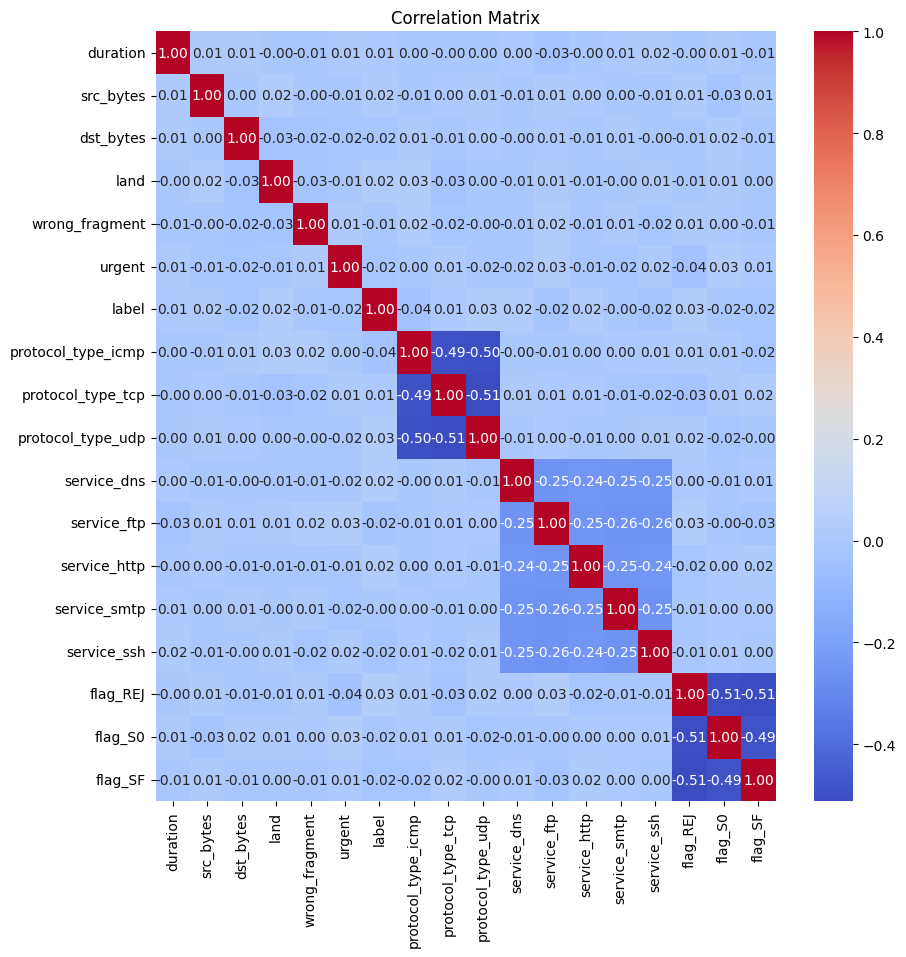

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
csv_path = 'C:\\Users\\HP\\dataset\\network_traffic.csv'
dummy_df = pd.read_csv(csv_path)

# Drop rows with NaN values
dummy_df = dummy_df.dropna()

# Keep columns with more than 1 unique value
dummy_df = dummy_df[[col for col in dummy_df if dummy_df[col].nunique() > 1]]

# Convert categorical columns to numeric using one-hot encoding
dummy_df = pd.get_dummies(dummy_df)

# Compute the correlation matrix
corr = dummy_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


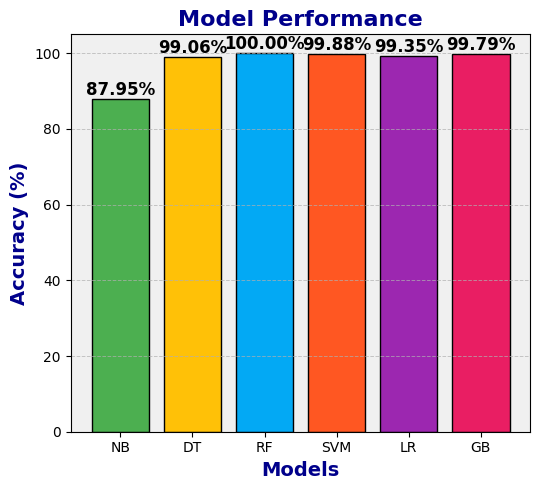

In [5]:
import matplotlib.pyplot as plt

# Data
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [87.951, 99.058, 99.997, 99.875, 99.352, 99.793]

# Create a figure
plt.figure(figsize=(15, 5), num=10)

# Create a subplot
ax = plt.subplot(131)

# Create the bar chart with customized colors
bars = ax.bar(names, values, color=['#4CAF50', '#FFC107', '#03A9F4', '#FF5722', '#9C27B0', '#E91E63'], edgecolor='black')

# Add background color
ax.set_facecolor('#f0f0f0')

# Add gridlines
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Add labels and title
ax.set_title('Model Performance', fontsize=16, fontweight='bold', color='darkblue')
ax.set_xlabel('Models', fontsize=14, fontweight='bold', color='darkblue')
ax.set_ylabel('Accuracy (%)', fontsize=14, fontweight='bold', color='darkblue')

# Add value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Show the plot
plt.tight_layout()
plt.show()


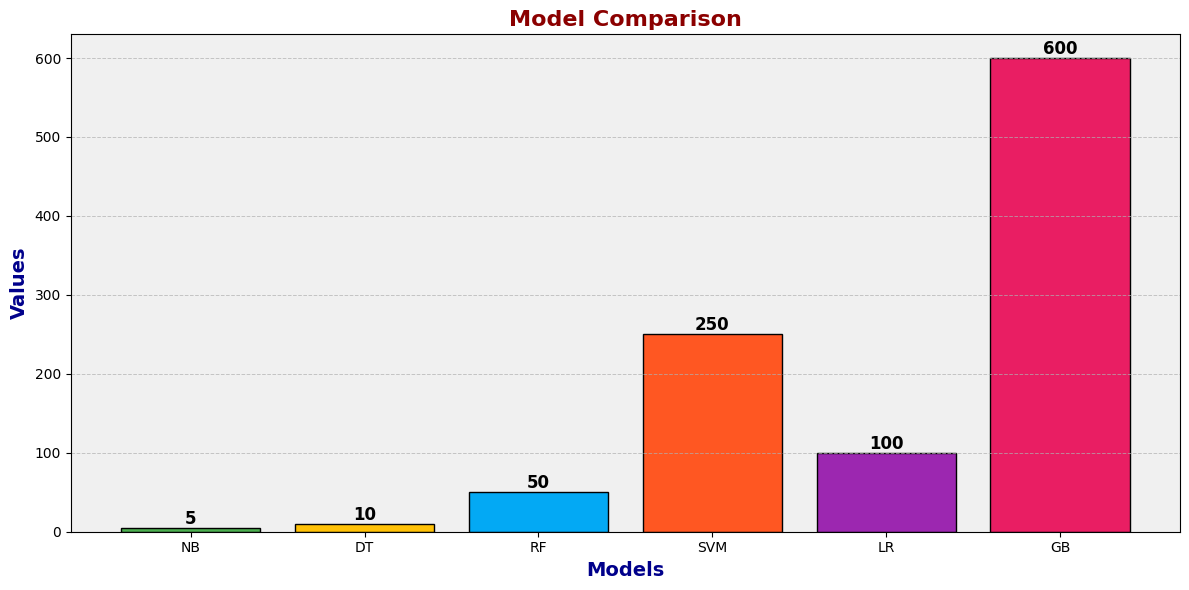

In [4]:
import matplotlib.pyplot as plt

# Data
models = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [5, 10, 50, 250, 100, 600]

# Create the figure and axis
plt.figure(figsize=(12, 6))

# Create the bar chart with customized colors
bars = plt.bar(models, values, color=['#4CAF50', '#FFC107', '#03A9F4', '#FF5722', '#9C27B0', '#E91E63'], edgecolor='black')

# Add labels to the chart
plt.xlabel('Models', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Values', fontsize=14, fontweight='bold', color='darkblue')
plt.title('Model Comparison', fontsize=16, fontweight='bold', color='darkred')

# Add value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Customize gridlines
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Customize the background color
plt.gca().set_facecolor('#f0f0f0')

# Show the plot
plt.tight_layout()
plt.show()


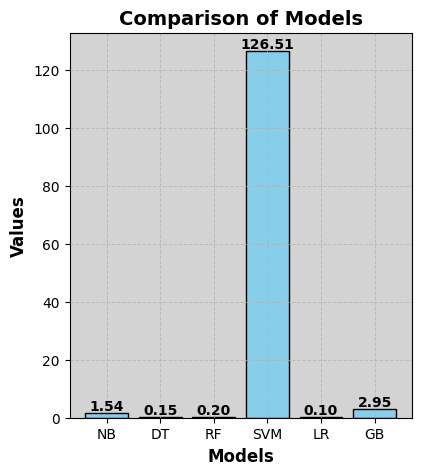

In [3]:
 
import matplotlib.pyplot as plt

# Data
names = ['NB', 'DT', 'RF', 'SVM', 'LR', 'GB']
values = [1.54329, 0.14877, 0.199471, 126.50875, 0.09605, 2.95039]

# Create a figure
f = plt.figure(figsize=(15, 5), num=10)

# Create a subplot
ax = plt.subplot(131)

# Plot the bar chart
bars = ax.bar(names, values, color='skyblue', edgecolor='black')

# Customize the background color
ax.set_facecolor('lightgrey')

# Add gridlines for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Add labels and title
ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Values', fontsize=12, fontweight='bold')
ax.set_title('Comparison of Models', fontsize=14, fontweight='bold')

# Add value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}', 
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Show the plot
plt.show()



In [29]:
import pandas as pd


file_path = 'C:/Users/HP/dataset/network_traffic.csv'


df = pd.read_csv(file_path)

if 'service' in df.columns:
    df.drop('service', axis=1, inplace=True)


print(df.head())


   duration protocol_type flag  src_bytes  dst_bytes  land  wrong_fragment  \
0        95           udp   SF       1635       1446     0               0   
1        50          icmp   SF       4340        368     1               0   
2        40          icmp   S0       3883        728     1               0   
3        48           udp  REJ        256       4661     1               1   
4        25           udp  REJ       2165       3211     1               1   

   urgent  label  
0       0      4  
1       0      0  
2       0      3  
3       0      4  
4       0      2  


##Spliting Data into Train and Test

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [31]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the CSV file into a DataFrame
file_path = 'C:/Users/HP/dataset/network_traffic.csv'
df = pd.read_csv(file_path)

# Print columns to check if 'target' and 'label' are present
print("Columns before dropping:", df.columns)

# Drop the 'target' column if it exists
if 'target' in df.columns:
    df = df.drop(['target'], axis=1)
else:
    print("Column 'target' does not exist in the DataFrame.")

print("Columns after dropping 'target':", df.columns)

# Ensure 'label' column exists
if 'label' not in df.columns:
    raise KeyError("Column 'label' does not exist in the DataFrame. Available columns are: " + ", ".join(df.columns))

# Target variable and features
y = df[['label']]
X = df.drop(['label'], axis=1)

# One-hot encoding for categorical columns
X = pd.get_dummies(X)

# Feature scaling
sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Columns before dropping: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'label'],
      dtype='object')
Column 'target' does not exist in the DataFrame.
Columns after dropping 'target': Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'label'],
      dtype='object')


Shape of X_train: (3350, 17)
Shape of X_test: (1650, 17)
Shape of y_train: (3350, 1)
Shape of y_test: (1650, 1)


##Training and Testing Models


Gaussian Naive Bayes Classifier


In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import time

# Load the CSV file into a DataFrame
file_path = 'C:/Users/HP/dataset/network_traffic.csv'
df = pd.read_csv(file_path)

# Print columns to check if 'target' and 'label' are present
print("Columns before dropping:", df.columns)

# Drop the 'target' column if it exists
if 'target' in df.columns:
    df = df.drop(['target'], axis=1)
else:
    print("Column 'target' does not exist in the DataFrame.")

print("Columns after dropping 'target':", df.columns)

# Ensure 'label' column exists
if 'label' not in df.columns:
    raise KeyError("Column 'label' does not exist in the DataFrame. Available columns are: " + ", ".join(df.columns))

# Target variable and features
y = df[['label']]
X = df.drop(['label'], axis=1)

# One-hot encoding for categorical columns
X = pd.get_dummies(X)

# Feature scaling
sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Naive Bayes classifier
clfg = GaussianNB()

# Timing the model fitting
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()

# Calculate the accuracy
y_pred = clfg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Training time: {end_time - start_time} seconds")
print(f"Accuracy: {accuracy}")
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import time

# Load the CSV file into a DataFrame
file_path = 'C:/Users/HP/dataset/network_traffic.csv'
df = pd.read_csv(file_path)

# Print columns to check if 'target' and 'label' are present
print("Columns before dropping:", df.columns)

# Drop the 'target' column if it exists
if 'target' in df.columns:
    df = df.drop(['target'], axis=1)
else:
    print("Column 'target' does not exist in the DataFrame.")

print("Columns after dropping 'target':", df.columns)

# Ensure 'label' column exists
if 'label' not in df.columns:
    raise KeyError("Column 'label' does not exist in the DataFrame. Available columns are: " + ", ".join(df.columns))

# Target variable and features
y = df[['label']]
X = df.drop(['label'], axis=1)

# One-hot encoding for categorical columns
X = pd.get_dummies(X)

# Feature scaling
sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Naive Bayes classifier
clfg = GaussianNB()

# Timing the model fitting
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()

# Calculate the accuracy
y_pred = clfg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Training time: {end_time - start_time} seconds")
print(f"Accuracy: {accuracy}")


Columns before dropping: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'label'],
      dtype='object')
Column 'target' does not exist in the DataFrame.
Columns after dropping 'target': Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'label'],
      dtype='object')
Shape of X_train: (3350, 17)
Shape of X_test: (1650, 17)
Shape of y_train: (3350, 1)
Shape of y_test: (1650, 1)
Training time: 0.0030133724212646484 seconds
Accuracy: 0.2012121212121212
Columns before dropping: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'label'],
      dtype='object')
Column 'target' does not exist in the DataFrame.
Columns after dropping 'target': Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'label']

Decision Tree Classifier

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import time

# Load the CSV file into a DataFrame
file_path = 'C:/Users/HP/dataset/network_traffic.csv'
df = pd.read_csv(file_path)

# Print columns to check if 'target' and 'label' are present
print("Columns before dropping:", df.columns)

# Drop the 'target' column if it exists
if 'target' in df.columns:
    df = df.drop(['target'], axis=1)
else:
    print("Column 'target' does not exist in the DataFrame.")

print("Columns after dropping 'target':", df.columns)

# Ensure 'label' column exists
if 'label' not in df.columns:
    raise KeyError("Column 'label' does not exist in the DataFrame. Available columns are: " + ", ".join(df.columns))

# Target variable and features
y = df[['label']]
X = df.drop(['label'], axis=1)

# One-hot encoding for categorical columns
X = pd.get_dummies(X)

# Feature scaling
sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Naive Bayes classifier
clfg = GaussianNB()

# Timing the model fitting
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()

# Calculate the accuracy
y_pred = clfg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Training time: {end_time - start_time} seconds")
print(f"Accuracy: {accuracy}")
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import time

# Load the CSV file into a DataFrame
file_path = 'C:/Users/HP/dataset/network_traffic.csv'
df = pd.read_csv(file_path)

# Print columns to check if 'target' and 'label' are present
print("Columns before dropping:", df.columns)

# Drop the 'target' column if it exists
if 'target' in df.columns:
    df = df.drop(['target'], axis=1)
else:
    print("Column 'target' does not exist in the DataFrame.")

print("Columns after dropping 'target':", df.columns)

# Ensure 'label' column exists
if 'label' not in df.columns:
    raise KeyError("Column 'label' does not exist in the DataFrame. Available columns are: " + ", ".join(df.columns))

# Target variable and features
y = df[['label']]
X = df.drop(['label'], axis=1)

# One-hot encoding for categorical columns
X = pd.get_dummies(X)

# Feature scaling
sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Naive Bayes classifier
clfg = GaussianNB()

# Timing the model fitting
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()

# Calculate the accuracy
y_pred = clfg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Training time: {end_time - start_time} seconds")
print(f"Accuracy: {accuracy}")


Columns before dropping: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'label'],
      dtype='object')
Column 'target' does not exist in the DataFrame.
Columns after dropping 'target': Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'label'],
      dtype='object')
Shape of X_train: (3350, 17)
Shape of X_test: (1650, 17)
Shape of y_train: (3350, 1)
Shape of y_test: (1650, 1)
Training time: 0.015917539596557617 seconds
Accuracy: 0.2012121212121212
Columns before dropping: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'label'],
      dtype='object')
Column 'target' does not exist in the DataFrame.
Columns after dropping 'target': Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'label'],

Random Forest Classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier

clfr = RandomForestClassifier(n_estimators = 30)
start_time = time.time()
clfr.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)


start_time = time.time()
y_test_pred = clfr.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)


print("Train score is:", clfr.score(X_train, y_train))
print("Test score is:", clfr.score(X_test, y_test))



Training time:  0.30254292488098145
Testing time:  0.03542900085449219
Train score is: 0.9997014925373134
Test score is: 0.1890909090909091


Supprt Vector Machine (Support Vector Classifier)

In [6]:

from sklearn.svm import SVC

clfs = SVC(gamma = 'scale')
start_time = time.time()
clfs.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)


start_time = time.time()
y_test_pred = clfs.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)


print("Train score is:", clfs.score(X_train, y_train))
print("Test score is:", clfs.score(X_test, y_test))



Training time:  0.7842042446136475
Testing time:  2.1968183517456055
Train score is: 0.35014925373134326
Test score is: 0.1806060606060606


Logistic Regression Classifier

In [7]:

from sklearn.linear_model import LogisticRegression

clfl = LogisticRegression(max_iter = 1200000)
start_time = time.time()
clfl.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)


start_time = time.time()
y_test_pred = clfl.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)


print("Train score is:", clfl.score(X_train, y_train))
print("Test score is:", clfl.score(X_test, y_test))



Training time:  0.03442049026489258
Testing time:  0.0029990673065185547
Train score is: 0.24328358208955222
Test score is: 0.2006060606060606


Gradient Boosting Classifier

In [37]:

from sklearn.ensemble import GradientBoostingClassifier

clfg = GradientBoostingClassifier(random_state = 0)
start_time = time.time()
clfg.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)


start_time = time.time()
y_test_pred = clfg.predict(X_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)


print("Train score is:", clfg.score(X_train, y_train))
print("Test score is:", clfg.score(X_test, y_test))



Training time:  3.4749412536621094
Testing time:  0.022908926010131836
Train score is: 0.5355223880597015
Test score is: 0.20303030303030303


In [38]:
import requests
from fpdf import FPDF

class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Cyber Forensic Analysis Report', 0, 1, 'C')

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(5)

    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()

def fetch_location_data(api_key, city_name):
    try:
        # Google Maps Geocoding API endpoint
        endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'
        params = {
            'address': city_name,
            'key': api_key
        }
        response = requests.get(endpoint, params=params)
        response.raise_for_status()  # Check for HTTP errors
        data = response.json()

        if data['status'] == 'OK':
            results = data['results'][0]
            formatted_address = results['formatted_address']
            location = results['geometry']['location']
            latitude = location['lat']
            longitude = location['lng']
            
            return (formatted_address, latitude, longitude)
        else:
            return f"Error: {data['status']}"
    except requests.RequestException as e:
        return f"Error fetching data: {e}"

def generate_report(location_data, output_path):
    pdf = PDF()
    pdf.add_page()

    pdf.chapter_title('Cyber Forensic Report on Location')

    if isinstance(location_data, tuple):
        formatted_address, latitude, longitude = location_data
        body = (f"Location Information:\n\n"
                f"Address: {formatted_address}\n"
                f"Latitude: {latitude}\n"
                f"Longitude: {longitude}\n")
    else:
        body = location_data

    pdf.chapter_body(body)

    pdf.output(output_path)

# Replace with your Google Maps API key
api_key = 'YOUR_GOOGLE_MAPS_API_KEY'

# City name to analyze
city_name = 'Chennai'  # Replace with the desired city name
output_pdf_path = r'C:\Users\HP\Downloads\cyber_forensic_report.pdf'

# Fetch location data
location_data = fetch_location_data(api_key, city_name)

# Generate forensic report
generate_report(location_data, output_pdf_path)

print(f"Cyber forensic report generated and saved to: {output_pdf_path}")


C:\Users\HP\AppData\Local\Temp\ipykernel_23028\2474651185.py:6: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 12)
C:\Users\HP\AppData\Local\Temp\ipykernel_23028\2474651185.py:7: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'Cyber Forensic Analysis Report', 0, 1, 'C')
C:\Users\HP\AppData\Local\Temp\ipykernel_23028\2474651185.py:10: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 12)
C:\Users\HP\AppData\Local\Temp\ipykernel_23028\2474651185.py:11: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=1 use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, title, 0, 1, 'L')
C:\Users\HP\AppData\Local\Temp\ipykernel_23028\2474651185.py:15: Deprec

Cyber forensic report generated and saved to: C:\Users\HP\Downloads\cyber_forensic_report.pdf


In [39]:
def generate_attack_data():
    while True:
        time.sleep(5)  # Simulate delay
        
        # Latitude and Longitude range for India
        lat = random.uniform(8.4, 37.6)   # Approximate latitude range for India
        lon = random.uniform(68.7, 97.3)  # Approximate longitude range for India
        
        place_name = get_place_name(lat, lon)
        data = {
            'type': random.choice(['DDoS', 'Malware', 'Phishing', 'SQL Injection']),
            'timestamp': time.time(),
            'location': {
                'lat': lat,
                'lng': lon,
                'place': place_name
            }
        }
        
        socketio.emit('new_attack', data)


In [40]:
from scapy.all import rdpcap


file_path = 'C:/Users/HP/Documents/ip.pcapng'

try:
    
    packets = rdpcap(file_path)
except FileNotFoundError:
    print(f"File not found: {file_path}")
else:
    
    for packet in packets:
        if packet.haslayer('IP'):
            ip_src = packet['IP'].src
            ip_dst = packet['IP'].dst
            print(f"Source IP: {ip_src}, Destination IP: {ip_dst}")


Source IP: 172.16.18.250, Destination IP: 224.0.0.22
Source IP: 172.16.17.20, Destination IP: 224.0.0.22
Source IP: 172.16.17.210, Destination IP: 172.16.19.255
Source IP: 172.16.19.54, Destination IP: 224.0.0.22
Source IP: 172.16.19.180, Destination IP: 224.0.0.22
Source IP: 172.16.19.187, Destination IP: 224.0.0.22
Source IP: 172.16.18.243, Destination IP: 224.0.0.22
Source IP: 172.16.19.148, Destination IP: 224.0.0.22
Source IP: 172.16.18.229, Destination IP: 224.0.0.22
Source IP: 172.16.17.185, Destination IP: 224.0.0.22
Source IP: 172.16.19.126, Destination IP: 224.0.0.22
Source IP: 172.16.19.231, Destination IP: 224.0.0.22
Source IP: 172.16.17.210, Destination IP: 172.16.19.255
Source IP: 172.16.18.12, Destination IP: 224.0.0.22
Source IP: 172.16.19.171, Destination IP: 239.255.255.250
Source IP: 172.16.19.143, Destination IP: 224.0.0.22
Source IP: 172.16.19.171, Destination IP: 239.255.255.250
Source IP: 172.16.16.104, Destination IP: 224.0.0.251
Source IP: 172.16.19.231, Destin

In [ ]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


In [ ]:
import os
import pandas as pd

# Define the file path
file_path = r"C:\Users\HP\dataset\network_traffic.csv"

# Print the file path to verify it's correct
print(f"Checking file path: {file_path}")

# Check if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file {file_path} does not exist.")

# Load dataset
data = pd.read_csv(file_path)
print("Dataset loaded successfully")

# Display the first few rows of the dataset
print(data.head())


Checking file path: C:\Users\HP\dataset\network_traffic.csv
Dataset loaded successfully
   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0        95           udp    http   SF       1635       1446     0   
1        50          icmp    smtp   SF       4340        368     1   
2        40          icmp    smtp   S0       3883        728     1   
3        48           udp    smtp  REJ        256       4661     1   
4        25           udp     ftp  REJ       2165       3211     1   

   wrong_fragment  urgent  label  
0               0       0      4  
1               0       0      0  
2               0       0      3  
3               1       0      4  
4               1       0      2  


Checking file path: C:\Users\HP\dataset\network_traffic.csv
Dataset loaded successfully
   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0        95           udp    http   SF       1635       1446     0   
1        50          icmp    smtp   SF       4340        368     1   
2        40          icmp    smtp   S0       3883        728     1   
3        48           udp    smtp  REJ        256       4661     1   
4        25           udp     ftp  REJ       2165       3211     1   

   wrong_fragment  urgent  label  
0               0       0      4  
1               0       0      0  
2               0       0      3  
3               1       0      4  
4               1       0      2  
Attack Type Distribution:
label
4    1000
0    1000
3    1000
2    1000
1    1000
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_3608\3360484502.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_counts.index, y=attack_counts.values, palette='viridis')


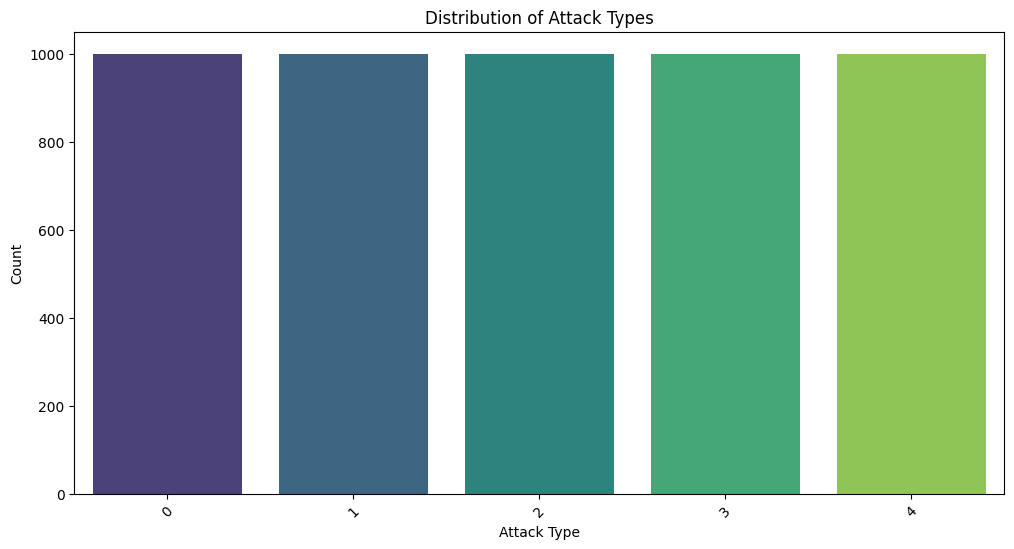

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path
file_path = r"C:\Users\HP\dataset\network_traffic.csv"

# Print the file path to verify it's correct
print(f"Checking file path: {file_path}")

# Check if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file {file_path} does not exist.")

# Load dataset
data = pd.read_csv(file_path)
print("Dataset loaded successfully")

# Display the first few rows of the dataset
print(data.head())

# Ensure the dataset contains a 'label' column for attack types
if 'label' not in data.columns:
    raise KeyError("The dataset does not contain a 'label' column for attack types.")

# Explore the distribution of attack types
attack_counts = data['label'].value_counts()
print("Attack Type Distribution:")
print(attack_counts)

# Visualize the attack types using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=attack_counts.index, y=attack_counts.values, palette='viridis')
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [18]:
# FAKE SMS SPAM 

#import numpy as np 
#import pandas as pd 
#import matplotlib.pyplot as plt 
#import seaborn as sns 
#import tensorflow as tf 
#from tensorflow import keras 
#from tensorflow.keras import layers
import csv
from faker import Faker

# Initialize Faker
fake = Faker()

# Define the number of fake messages
num_messages = 50

# Define the file path for the CSV file
file_path = 'fake_messages.csv'

# Open a CSV file to write the fake messages
with open(file_path, 'w', newline='') as csvfile:
    fieldnames = ['id', 'timestamp', 'sender', 'message']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write the header row
    writer.writeheader()

    # Generate fake messages
    for i in range(num_messages):
        writer.writerow({
            'id': i + 1,
            'timestamp': fake.date_time_this_year().strftime('%Y-%m-%d %H:%M:%S'),
            'sender': fake.name(),
            'message': fake.text(max_nb_chars=200)
        })

print(f'{num_messages} fake messages CSV file created successfully at {file_path}.')


50 fake messages CSV file created successfully at fake_messages.csv.


In [1]:
import pandas as pd


csv_file_path = r"C:\Users\HP\Downloads\resume\spam.csv"


df = pd.read_csv(csv_file_path, encoding='latin-1')


print(df.head())


                                     message        date    status
0   Congratulations! You've Won a Gift Card!  2024-08-07  Detected
1  Important Notice: Verify Your Account Now  2024-08-06  Detected
2    Exclusive Offer: 70% Off - Limited Time  2024-08-05  Detected
3              Claim Your Free iPhone Today!  2024-08-04  Detected
4     Get a Free Subscription to Our Service  2024-08-03  Detected


In [20]:
import csv
from faker import Faker
import random
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize Faker
fake = Faker()

# Define the number of fake messages
num_messages = 50

# Define the file path for the CSV file
file_path = 'fake_messages.csv'

# Open a CSV file to write the fake messages
with open(file_path, 'w', newline='') as csvfile:
    fieldnames = ['id', 'timestamp', 'sender', 'receiver', 'message', 'label']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Write the header row
    writer.writeheader()

    # Generate fake messages
    for i in range(num_messages):
        sender = fake.name()
        receiver = fake.name()
        message = fake.text(max_nb_chars=200)
        label = random.choice(['ham', 'spam'])  # Randomly assign 'ham' or 'spam' label
        
        writer.writerow({
            'id': i + 1,
            'timestamp': fake.date_time_this_year().strftime('%Y-%m-%d %H:%M:%S'),
            'sender': sender,
            'receiver': receiver,
            'message': message,
            'label': label
        })

print(f'{num_messages} fake messages CSV file created successfully at {file_path}.')

# Function to display a random fake message and alert the user
def display_fake_message_and_alert(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Select a random message
    if not df.empty:
        random_message = df.sample(n=1).iloc[0]
        message_id = random_message['id']
        timestamp = random_message['timestamp']
        sender = random_message['sender']
        receiver = random_message['receiver']
        message = random_message['message']
        label = random_message['label']
        
        # Display the message
        print(f"Message ID: {message_id}")
        print(f"Timestamp: {timestamp}")
        print(f"Sender: {sender}")
        print(f"Receiver: {receiver}")
        print(f"Message: {message}")
        print(f"Label: {label}")
        
        # Alert the user
        print("\nALERT: This message is fake and for business purposes only.")

# Display a fake message and alert the user
display_fake_message_and_alert(file_path)

# Load data for spam detection model
df = pd.read_csv(file_path)

# Vectorize the message text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nSpam Detection Model Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


50 fake messages CSV file created successfully at fake_messages.csv.
Message ID: 7
Timestamp: 2024-04-03 05:26:57
Sender: David Goodwin
Receiver: Barbara Matthews
Message: Building throughout lead production. Admit system either region traditional himself.
Label: spam

ALERT: This message is fake and for business purposes only.

Spam Detection Model Accuracy: 0.47
Classification Report:
              precision    recall  f1-score   support

         ham       0.54      0.78      0.64         9
        spam       0.00      0.00      0.00         6

    accuracy                           0.47        15
   macro avg       0.27      0.39      0.32        15
weighted avg       0.32      0.47      0.38        15



In [ ]:
import pandas as pd
csv_file_path = r"C:\Users\HP\Downloads\resume\spam.csv"


df = pd.read_csv(csv_file_path, encoding='latin-1')


print("Columns in the DataFrame:", df.columns)


columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

if existing_columns_to_drop:
    df = df.drop(existing_columns_to_drop, axis=1)


print("Columns before renaming:", df.columns)


if 'v1' in df.columns and 'v2' in df.columns:
    df = df.rename(columns={'v1': 'label', 'v2': 'Text'})
else:
    print("Columns 'v1' and/or 'v2' are not present in the DataFrame.")


print("Columns after renaming:", df.columns)


if 'label' in df.columns:
    df['label_enc'] = df['label'].map({'ham': 0, 'spam': 1})
else:
    print("Column 'label' is not present. Unable to encode labels.")


print(df.head())


import seaborn as sns
import matplotlib.pyplot as plt

if 'label' in df.columns:
    sns.countplot(x=df['label'])
    plt.title('Count of Spam vs. Ham Messages')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()
else:
    print("Column 'label' is not available for plotting.")


Columns in the DataFrame: Index(['message', 'date', 'status'], dtype='object')
Columns before renaming: Index(['message', 'date', 'status'], dtype='object')
Columns 'v1' and/or 'v2' are not present in the DataFrame.
Columns after renaming: Index(['message', 'date', 'status'], dtype='object')
Column 'label' is not present. Unable to encode labels.
                                     message        date    status
0   Congratulations! You've Won a Gift Card!  2024-08-07  Detected
1  Important Notice: Verify Your Account Now  2024-08-06  Detected
2    Exclusive Offer: 70% Off - Limited Time  2024-08-05  Detected
3              Claim Your Free iPhone Today!  2024-08-04  Detected
4     Get a Free Subscription to Our Service  2024-08-03  Detected
Column 'label' is not available for plotting.


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Generate synthetic data for demonstration
def generate_synthetic_data():
    # Replace with real network traffic data
    data = np.random.rand(1000, 10)  # 1000 samples with 10 features
    return data

# Prepare data
data = generate_synthetic_data()
train_data = data[:800]
test_data = data[800:]

# Create a timeseries generator
sequence_length = 10
generator = TimeseriesGenerator(train_data, train_data, length=sequence_length, batch_size=32)

# Build LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, train_data.shape[1])),
    Dense(train_data.shape[1])
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(generator, epochs=10)

# Real-time prediction
def predict_real_time_data(new_data):
    prediction = model.predict(np.expand_dims(new_data, axis=0))
    return prediction

# Example real-time data
real_time_data = np.random.rand(sequence_length, 10)
prediction = predict_real_time_data(real_time_data)
print(f"Prediction: {prediction}")


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
 1/25 ━━━━━━━━━━━━━━━━━━━━ 1:09 3s/step - loss: 0.3436

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2422
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0897
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0860
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0870
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0852
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0866
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0847
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0853
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0845
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0836
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
Prediction: [[0.51295763 0.5781678  0.5072392  0.5109061  0.56069934 0.52601457
  0.5148931  0.5202823  0.56230205 0.5493994 ]]


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2072
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0893
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0876
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0865
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0868
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0859
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0856
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0850
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0853
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0874


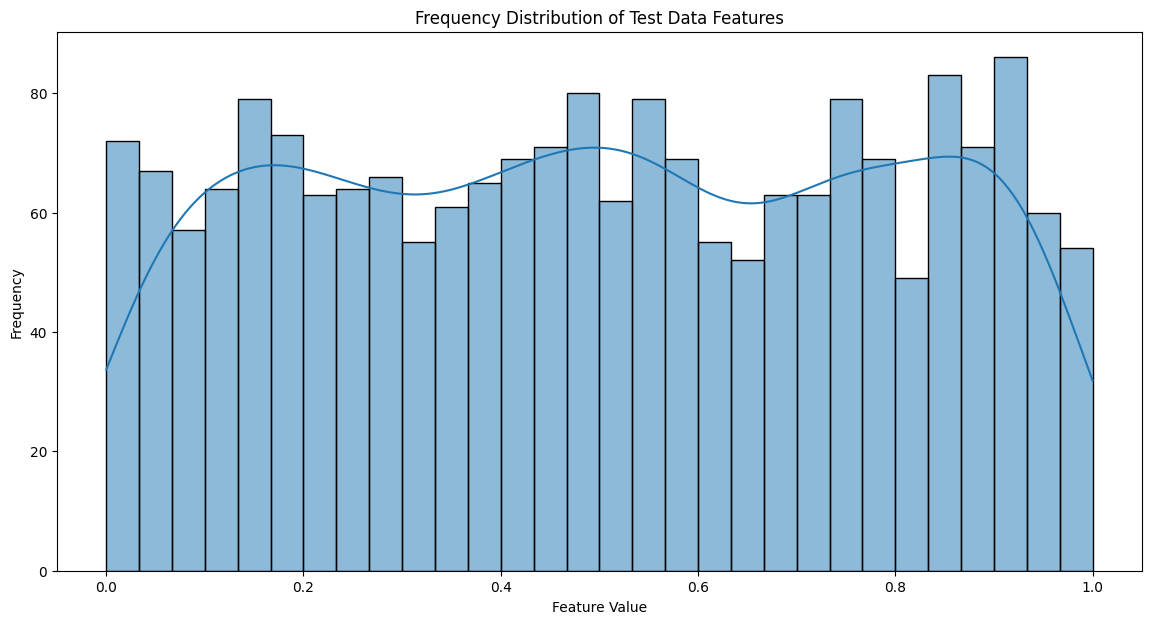

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


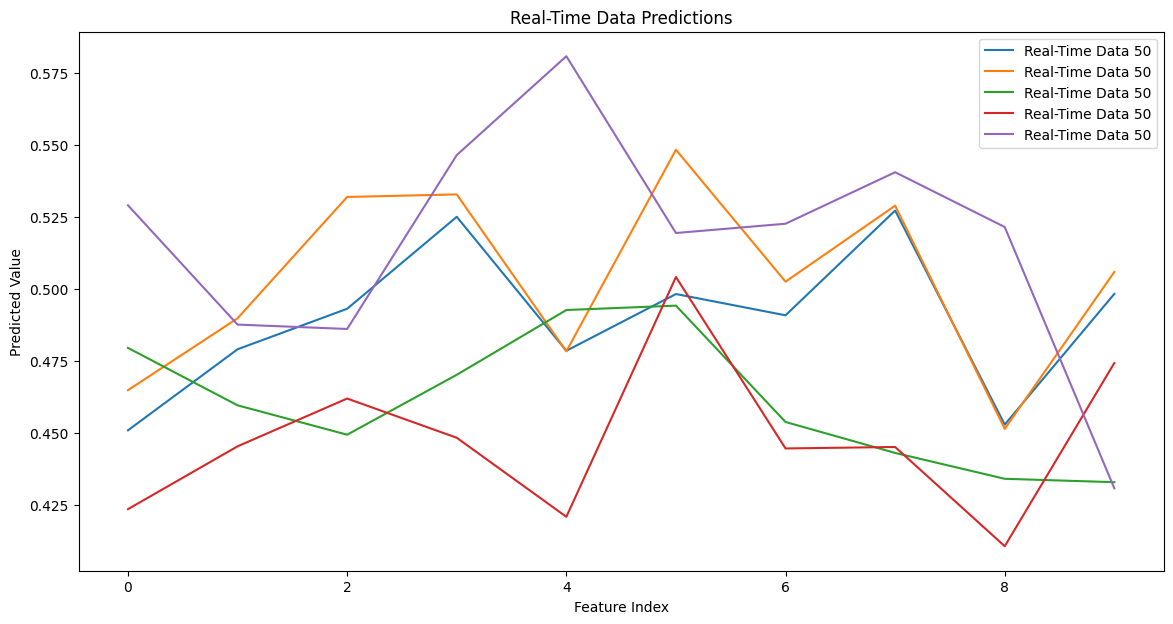

In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data (replace this with actual data)
def generate_synthetic_data(num_samples=1000, num_features=10):
    np.random.seed(0)
    data = np.random.rand(num_samples, num_features)
    return data

# Prepare data
data = generate_synthetic_data()
train_data = data[:800]
test_data = data[800:]

# Create a timeseries generator
sequence_length = 10
generator = TimeseriesGenerator(train_data, train_data, length=sequence_length, batch_size=32)

# Build LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(sequence_length, train_data.shape[1])),
    Dense(train_data.shape[1])
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(generator, epochs=10)

# Function to predict real-time data
def predict_real_time_data(model, new_data):
    new_data = np.expand_dims(new_data, axis=0)
    prediction = model.predict(new_data)
    return prediction

# Function to visualize frequency analysis
def plot_frequency_analysis(data, title):
    plt.figure(figsize=(14, 7))
    sns.histplot(data, kde=True, bins=30)
    plt.title(title)
    plt.xlabel('Feature Value')
    plt.ylabel('Frequency')
    plt.show()

# Example of frequency analysis on synthetic data
plot_frequency_analysis(test_data.flatten(), 'Frequency Distribution of Test Data Features')

# Real-time data simulation
def simulate_real_time_data(sequence_length, num_features):
    return np.random.rand(sequence_length, num_features)

# Real-time update visualization (example with synthetic data)
def real_time_update_simulation(model, sequence_length, num_features):
    plt.figure(figsize=(14, 7))
    for _ in range(5):  # Simulate 5 real-time updates
        real_time_data = simulate_real_time_data(sequence_length, num_features)
        prediction = predict_real_time_data(model, real_time_data)
        plt.plot(prediction.flatten(), label=f'Real-Time Data {i+1}')
    plt.title('Real-Time Data Predictions')
    plt.xlabel('Feature Index')
    plt.ylabel('Predicted Value')
    plt.legend()
    plt.show()

# Run real-time update simulation
real_time_update_simulation(model, sequence_length, train_data.shape[1])
